In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def W_V_source(z, I, z_0):
    W = I * np.log(z - z_0) / (2 * np.pi)
    V = -I / (2 * np.pi * (z - z_0))
    return W, V

In [3]:
def W_V_sink(z, I, z_0):
    W = -I * np.log(z - z_0) / (2 * np.pi)
    V = I / (2 * np.pi * (z - z_0))
    return W, V

In [4]:
def W_V_vortex(z, I, z_0):
    W = I  * np.log(z - z_0) / (2 * np.pi * 1j)
    V = I / (2 * np.pi * (z - z_0) * 1j)
    return W, V

In [5]:
def picture_1(z_0_1, I_1, z_0_2, I_2, Z):
    W_source, V_source = W_V_source(Z, I_1, z_0_1)
    W_sink, V_sink = W_V_sink(Z, I_2, z_0_2)

    W_total = W_source + W_sink
    V_total = V_source + V_sink

    stream_function = np.imag(W_total)
    velocity_potential = np.real(W_total)

    plt.figure(figsize=(6, 6))

    plt.streamplot(X, Y, np.real(V_total), np.imag(V_total), color='blue', density=2)
    contour = plt.contour(X, Y, velocity_potential, levels=50, colors='red', linestyles='solid')

    plt.title(f'одиночный источник с I = {I_1}, z_0 = {z_0_1} и одинарный сток с I = {I_2}, z_0 = {z_0_2}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()

In [6]:
def picture_2(z_0_1, I_1, z_0_2, I_2, Z):
    W_vortex_1, V_vortex_1 = W_V_vortex(Z, I_1, z_0_1)
    W_vortex_2, V_vortex_2 = W_V_vortex(Z, I_2, z_0_2)

    W_total = W_vortex_1 + W_vortex_2
    V_total = V_vortex_1 + V_vortex_2
    
    stream_function = np.imag(W_total)
    velocity_potential = np.real(W_total)

    plt.figure(figsize=(6, 6))

    plt.streamplot(X, Y, np.real(V_total), np.imag(V_total), color='blue', density=2)
    contour = plt.contour(X, Y, velocity_potential, levels=50, colors='red', linestyles='solid')

    plt.title(f'два вихря с противоположными направлениями вращения при I = {I_1, I_2} и z_0 = {z_0_1, z_0_2}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()

In [7]:
def picture_3(z_0_1, I_1, z_0_2, I_2, Z):
    W_vortex, V_vortex = W_V_vortex(Z, I_1, z_0_1)
    W_source, V_source = W_V_source(Z, I_2, z_0_2)

    W_total = W_vortex + W_source
    V_total = V_vortex + V_source

    stream_function = np.imag(W_total)
    velocity_potential = np.real(W_total)

    plt.figure(figsize=(6, 6))

    plt.streamplot(X, Y, np.real(V_total), np.imag(V_total), color='blue', density=2)
    contour = plt.contour(X, Y, velocity_potential, levels=50, colors='red', linestyles='solid')

    plt.title(f'комбинация источника и вихря при I = {I_1, I_2} и z_0 = {z_0_1, z_0_2}')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.show()


In [8]:
x = np.linspace(-4, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)

Z = X + 1j*Y

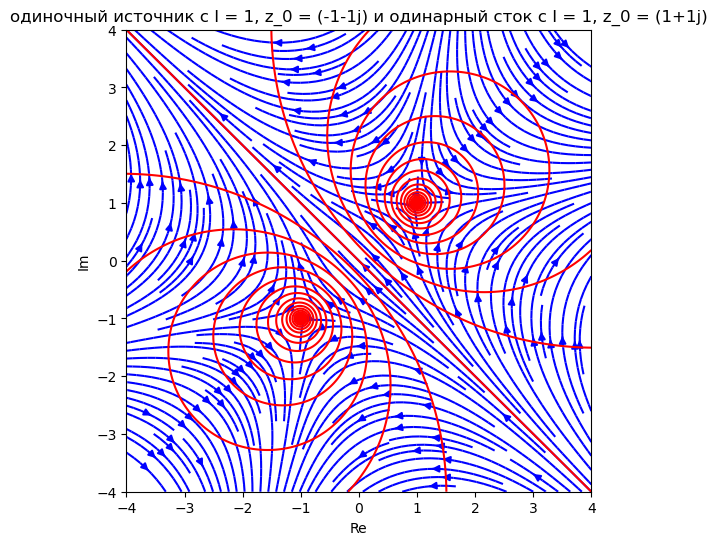

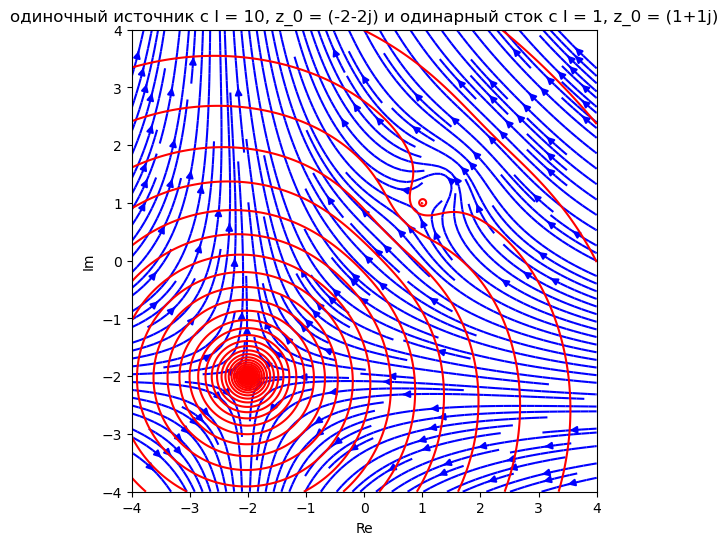

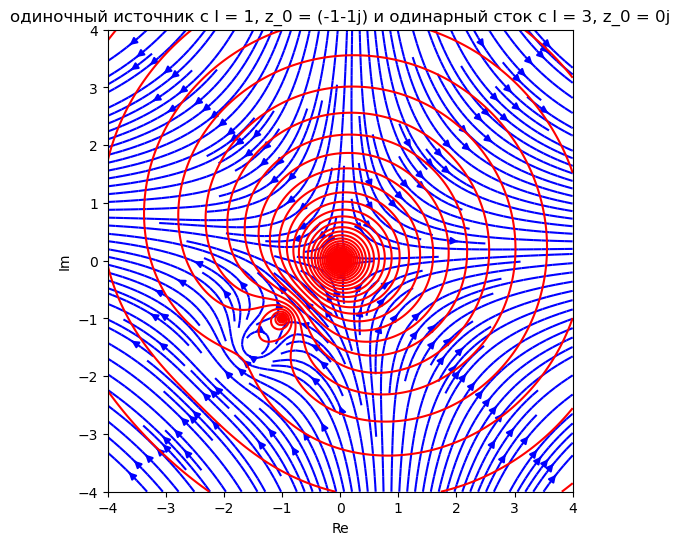

In [9]:
picture_1(complex(-1, -1), 1, complex(1, 1), 1, Z)
picture_1(complex(-2, -2), 10, complex(1, 1), 1, Z)
picture_1(complex(-1, -1), 1, complex(0, 0), 3, Z)

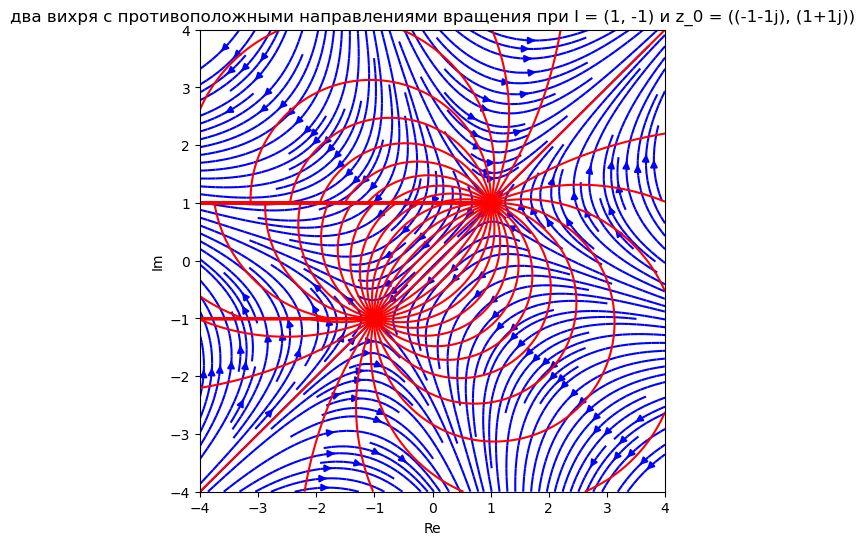

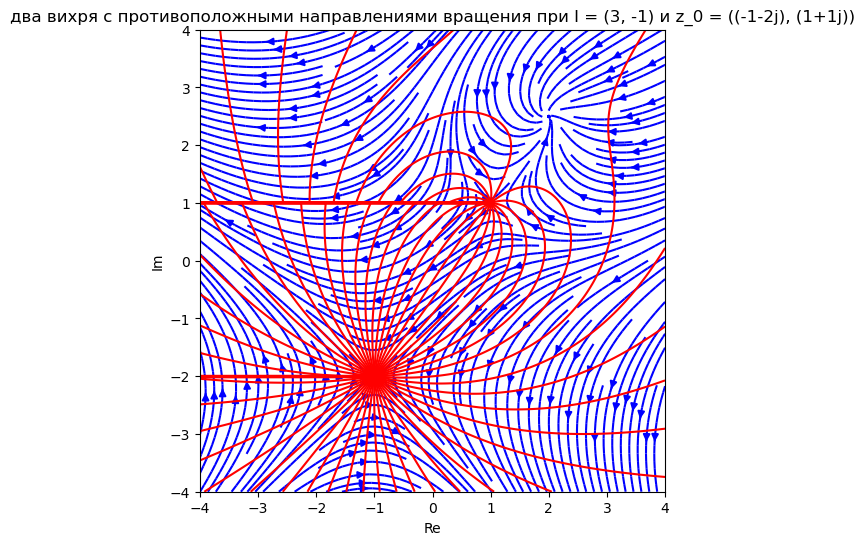

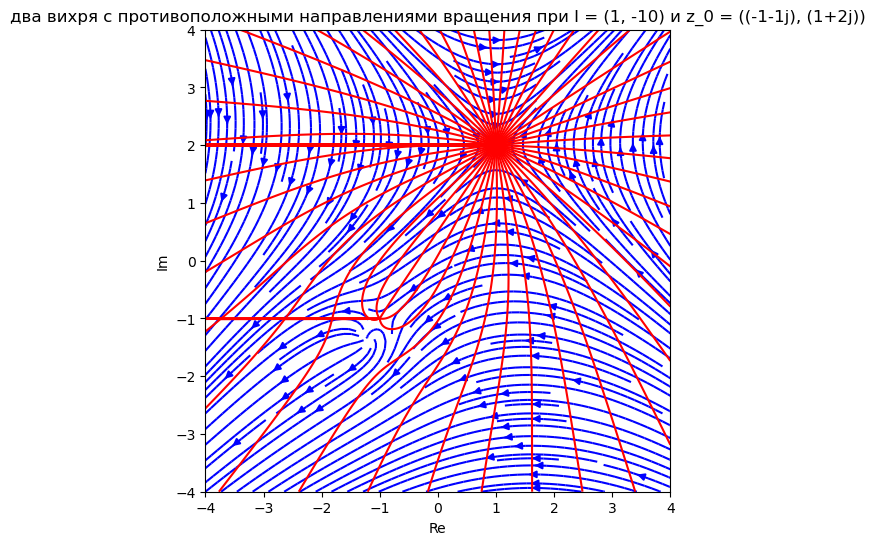

In [10]:
picture_2(complex(-1, -1), 1, complex(1, 1), -1, Z)
picture_2(complex(-1, -2), 3, complex(1, 1), -1, Z)
picture_2(complex(-1, -1), 1, complex(1, 2), -10, Z)

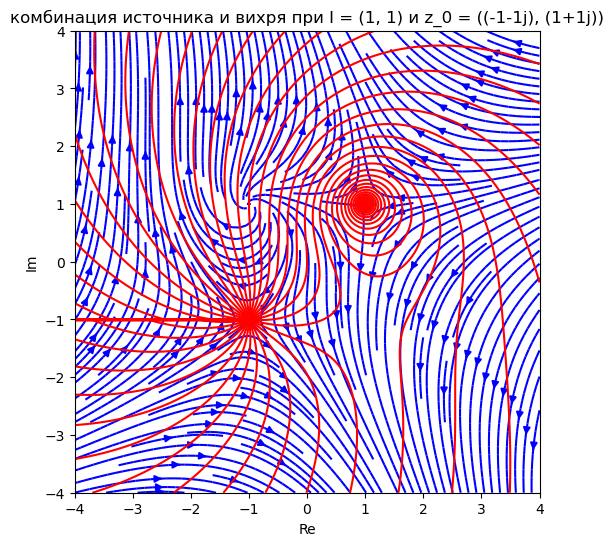

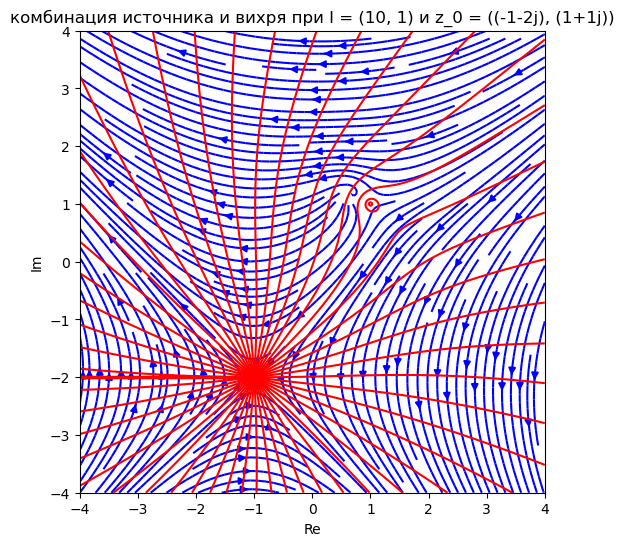

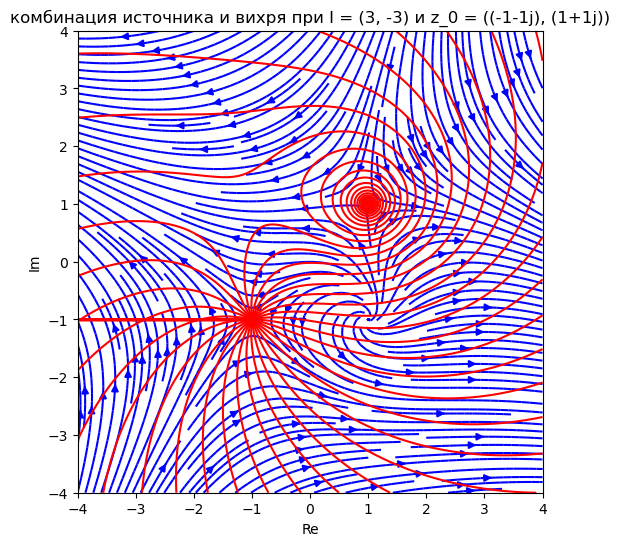

In [11]:
picture_3(complex(-1, -1), 1, complex(1, 1), 1, Z)
picture_3(complex(-1, -2), 10, complex(1, 1), 1, Z)
picture_3(complex(-1, -1), 3, complex(1, 1), -3, Z)